In [180]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

# Single Variable Exploration - Self Check Exercise

This is a (mostly) empty template that can be used for a little bit of a self check of the CH 1-4 stuff, or the basic examination of one varaible.

This is useful becuase there's very little guidance, so you'll need to figure out what to do on your own. Looking forward, one of the primary reasons that we need to know this stuff for machine learning is something called Exploratory Data Analysis (EDA), which is usually the first step in doing machine learning stuff. We take whatever data we're using, load it up, and look through it to see if anything is wrong, weird, useful, or interersting. This helps us prepare our data for the ML work, to make things as accurate and reliable as possible. This little bit is kind of part 1 of EDA that you'll need to do later on.

The first dataset is pretty simple. The second is slightly more complex. 

Here's a few potentially useful things that you don't need to memorize:
<ul>
<li>Get rid of any non-numbers: newDataFrame = oldDF[~np.isnan(oldDF)]
<li>Apply a function to everything in a dataframe (one with one column!): (e.g. mult by 2.54): dataFrame.apply(lambda x: x*2.54)
</ul>

In [181]:
#Load the data
#filename is 'HeightWeight.csv"
df = pd.read_csv("HeightWeight.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [182]:
#Do basic exploration - range, min, max, std, mean...
#Ask yourself, does this match your understanding of reality?
df.describe(include="all")

,Gender,Height,Weight,Index
count,500,500.000000,500.000000,500.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,255,NaN,NaN,NaN
mean,NaN,169.944000,106.000000,3.748000
std,NaN,16.375261,32.382607,1.355053
min,NaN,140.000000,50.000000,0.000000
25%,NaN,156.000000,80.000000,3.000000
50%,NaN,170.500000,106.000000,4.000000
75%,NaN,184.000000,136.000000,5.000000


In [183]:
#Graph it, can you make a histogram, PMF, CDF?
#When you look at it, does it make sense?
hist = thinkstats2.Hist(round(df["Weight"], -1), label="Weight")
pmf = thinkstats2.Pmf(round(df["Weight"], -1), label="Weight")
cdf = thinkstats2.Cdf(round(df["Weight"]), label="Weight")

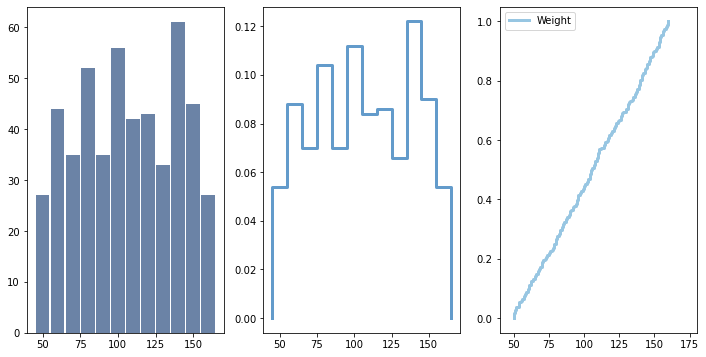

In [184]:
thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(hist)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf)
thinkplot.Config(xlim=[40, 180])

In [185]:
#Split the data. Do the stats and graphs for each gender.
#Again, does it make sense? Match your understanding of reality?
df_man = df[df["Gender"] == "Male"]
df_fem = df[df["Gender"] == "Female"]

In [186]:
#Create a bunch of split hist/pmf/cdf
histm = thinkstats2.Hist(round(df_man["Weight"], -1), label="Men")
histf = thinkstats2.Hist(round(df_fem["Weight"], -1), label="Women")

pmfm = thinkstats2.Pmf(round(df_man["Weight"], -1), label="Men")
pmff = thinkstats2.Pmf(round(df_fem["Weight"], -1), label="Women")

cdfm = thinkstats2.Cdf(round(df_man["Weight"]), label="Men")
cdff = thinkstats2.Cdf(round(df_fem["Weight"]), label="Women")

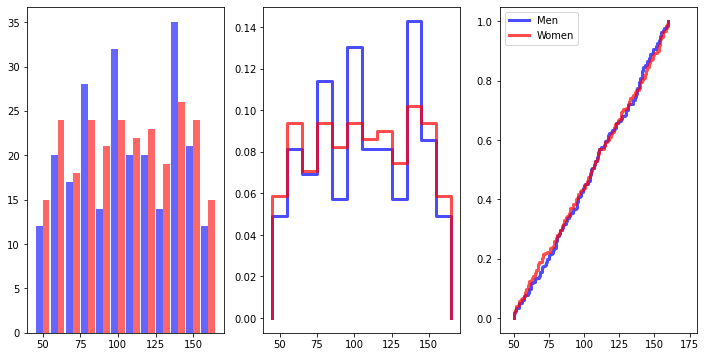

In [187]:
thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(histm, color="blue", align="right", width=4.5)
thinkplot.Hist(histf, color="red", align="left", width=4.5)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmfm, color="blue")
thinkplot.Pmf(pmff, color="red")
thinkplot.SubPlot(3)
thinkplot.Cdf(cdfm, color="blue")
thinkplot.Cdf(cdff, color="red")
thinkplot.Config(xlim=[40, 180])

In [188]:
#In your exploration, did anythign stand out? Are there weird patterns? Outliers? Things that
#don't make sense? Errors? Incorrect values?
#(This dataset is pretty simple, so if you don't see anything crazy, that's normal)

#Weight of women seems to be slightly flatter (lower kurtosis - this term comes later)
#Overall it is more uniform, and less normal than I'd expect. 

Repeat the basic process with this more complex data. For this, you might need to do more investigation/examination - particulary with things like errors, outliers, etc....

This is kind of realistic - here's some data, is there anything we need to 'worry' about in using it? Does anything jump out as potentially interesting? Or possibly indicitive of something? 

If you consider WAGE as the varaible you care about - look for dasic descriptions, patterns, outliers or errors. Do things like POSITION or NATIONALITY indicate any differences in the WAGE?

In [189]:
#Filename is "fifa_eda.csv"
df2 = pd.read_csv("fifa_eda.csv")
df2.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [190]:
#Generate some statistics
df2 = df2[df2["Wage"] > 0]
df2.describe(include="all")

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
count,17966.000000,17966,17966.000000,17966,17966.000000,17966.000000,17966,17955.000000,17966.000000,17966,17918.000000,17918.000000,17966,17966.000000,17918,17966.000000,17966.000000,17966.000000
unique,NaN,16968,NaN,163,NaN,NaN,651,NaN,NaN,2,NaN,NaN,27,NaN,35,NaN,NaN,NaN
top,NaN,J. Rodríguez,NaN,England,NaN,NaN,Atlético Madrid,NaN,NaN,Right,NaN,NaN,ST,NaN,2019-01-01,NaN,NaN,NaN
freq,NaN,11,NaN,1662,NaN,NaN,33,NaN,NaN,13804,NaN,NaN,2130,NaN,4870,NaN,NaN,NaN
mean,214244.857230,NaN,25.104976,NaN,66.225481,71.317322,NaN,2444.530214,9.861850,NaN,1.113908,2.362875,NaN,2016.426250,NaN,5.946753,165.968886,4585.060973
std,30039.126767,NaN,4.674724,NaN,6.923435,6.146192,NaN,5626.715434,22.117274,NaN,0.395495,0.756309,NaN,2.031094,NaN,0.220517,15.583224,10701.480252
min,16.000000,NaN,16.000000,NaN,46.000000,48.000000,NaN,10.000000,1.000000,NaN,1.000000,1.000000,NaN,1991.000000,NaN,5.083333,110.000000,13.000000
25%,200255.250000,NaN,21.000000,NaN,62.000000,67.000000,NaN,325.000000,1.000000,NaN,1.000000,2.000000,NaN,2016.000000,NaN,5.750000,154.000000,563.000000
50%,221710.500000,NaN,25.000000,NaN,66.000000,71.000000,NaN,700.000000,3.000000,NaN,1.000000,2.000000,NaN,2017.000000,NaN,5.916667,165.000000,1300.000000
75%,236529.750000,NaN,28.000000,NaN,71.000000,75.000000,NaN,2100.000000,9.000000,NaN,1.000000,3.000000,NaN,2018.000000,NaN,6.083333,176.000000,4585.060806


In [191]:
df3 = df2[["Wage", "Position", "Nationality"]]
df3.describe(include="all")

,Wage,Position,Nationality
count,17966.000000,17966,17966
unique,NaN,27,163
top,NaN,ST,England
freq,NaN,2130,1662
mean,9.861850,NaN,NaN
std,22.117274,NaN,NaN
min,1.000000,NaN,NaN
25%,1.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,9.000000,NaN,NaN


One thing to note right here - we have a real outlier! Look at the largest wage.
Is this an error? Is someone just Bezos-level right? We need domain knowledge - i.e. I'm going to look up more info and Google

As well, some people have a wage of 0.

In [192]:
#Look up the rich person
df2[df2["Wage"] == 565]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0


I don't know much about the details of soccer, but I do know Messi is a crazy huge star. I'm going to Google "Messi Wage" and see what I find. 
One of the first hits was: https://www.cbssports.com/soccer/news/lionel-messi-barcelona-contract-details-674-million-earnings-leaked-by-spanish-paper-in-bombshell-report/
It appears this is real. 

Should we remove it? Depends on out exact intent... If we are looking at how much soccar players normally earn, filtering out people who are such massive outliers
may make sense. This is where we need to understand what we are doing this for, in reality - not stats.
We are basically doing this as an exercise, so we can arbitrarily pick. I'm going to say that if there is a 'stream' of big salaries leading up to Messi, we'll leave it in. 
If he's way out in front with a massive 

The 0 wages are similar. Are they players who are between contracts? Players who didn't make the cut? We need to know what this means in reality to make a real decision. 
Since the wage values are in the hundreds, and based off of what I read in teh above article, I can surmise that these contracts are likely less than one million, since the wage
values are measured in millions. They stay!

In [193]:
#Look at the top 25 salaries
df2 = df2.sort_values(by=["Wage"], ascending=False)
df2.head(25)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.000000
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000.0,455.0,Right,5.0,3.0,RS,2014,2021-01-01,6.000000,190.0,164000.000000
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420.0,Right,4.0,4.0,RCM,2012,2020-01-01,5.666667,146.0,137400.000000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.000000
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380.0,Right,4.0,3.0,RCB,2005,2020-01-01,6.000000,181.0,104600.000000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.000000
36,173731,G. Bale,28,Wales,88,88,Real Madrid,60000.0,355.0,Left,4.0,4.0,ST,2013,2022-01-01,6.083333,181.0,123000.000000
11,182521,T. Kroos,28,Germany,90,90,Real Madrid,76500.0,355.0,Right,4.0,3.0,LCM,2014,2022-01-01,6.000000,168.0,156800.000000
32,189242,Coutinho,26,Brazil,88,89,FC Barcelona,69500.0,340.0,Right,3.0,5.0,LW,2018,2023-01-01,5.666667,150.0,147700.000000
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000.0,340.0,Right,4.0,4.0,LF,2012,2020-01-01,5.666667,163.0,172100.000000


There are a lot of big contracts, Messi shall live on in our data.

In [194]:
#Graph the wage on its own.
#Create objects for graphing
hist2 = thinkstats2.Hist(round(df3["Wage"], -1))
pmf2 = thinkstats2.Pmf(round(df3["Wage"], -1))
cdf2 = thinkstats2.Cdf(df3["Wage"])

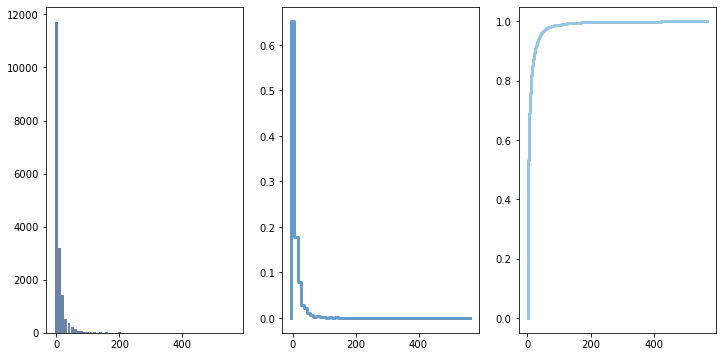

In [195]:
#Create graphs
thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.Config()

{'xscale': 'linear', 'yscale': 'linear'}

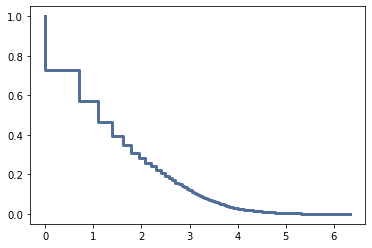

In [196]:
#Pareto Visual Test
dflg = df2[df2["Wage"]>=1].sort_values('Wage')
xs2 = np.log(dflg["Wage"])
thinkplot.Cdf(thinkstats2.Cdf(xs2), scaley="log", complement=True)
#xs2

Looks very clustered at the start. Maybe a pareto dist?

I'm going take a quick look at the distribution and zoom in on the start, with the lower salaries before going forward. 

In [197]:
#See how many contratcts are....

#Less than 1 million
print(cdf2.Prob(1))
#Less than 10 million
print(cdf2.Prob(10))
#Less than 20 million
print(cdf2.Prob(20))

0.2727373928531671
0.776355337860403
0.8807747968384727


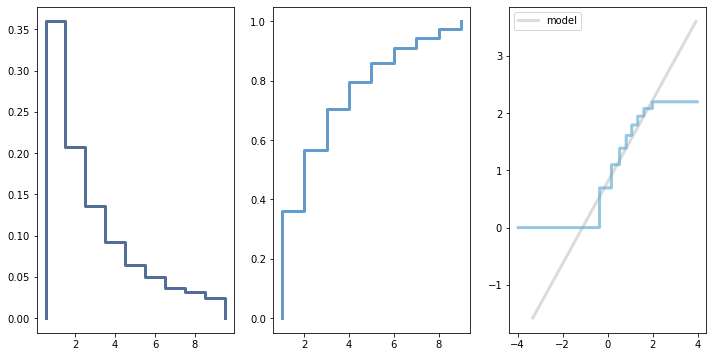

In [208]:
#Take a quick look at the lower salaries. 
thinkplot.PrePlot(3, cols=3)
dftmp = df3[df3["Wage"]<10]
thinkplot.Pmf(thinkstats2.Pmf(dftmp["Wage"]))
thinkplot.SubPlot(2)
thinkplot.Cdf(thinkstats2.Cdf(dftmp["Wage"]))
thinkplot.SubPlot(3)
thinkstats2.NormalProbabilityPlot(np.log(dftmp["Wage"]))
thinkplot.Config()

In [210]:
dftmp["Wage"].mean(), dftmp["Wage"].std()

(2.8860518013060386, 2.155362021846207)

Based off of all this I can probably conclude that the vast majority of players have relatively "small" contracts, and there's a trickle of richer people. 

Quick look at the hight salaries...

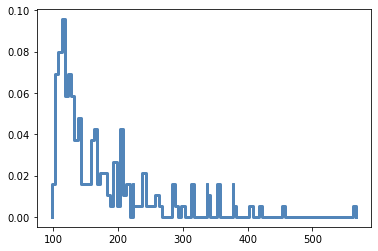

In [ ]:
#Take a quick look at the high salaries. 
thinkplot.PrePlot(1)
dftmp2 = df3[df3["Wage"]>=100]
thinkplot.Pmf(thinkstats2.Pmf(dftmp2["Wage"]))
thinkplot.Config()

We were asked to look at position and nationality, so we can examine that and see if that impacts wages
This part isn't super straightforward, since both nationality and position have lots of options, ealistically, this requires some open ended thought, and probably a little research.

My first idea is to calculate the mean (and maybe other stats) for each position or each nationality. I need to figure out how to take all goalies, calculate metrics, then take all defenders, calculate metrics, etc....
Or something along those lines, there are a lot of ways to address a querstion like this...

In [ ]:
#We could write a loop, but that is more work.
#The groupby function does it for us, we say how we want it grouped, and add the calculation for each group. 
#We can do this once for each metric we care about, then put the results into a new dataframe.

posWages = df3.groupby(by="Position").mean()
posStd = df3.groupby(by="Position").std()
posMed = df3.groupby(by="Position").median()

wages = pd.DataFrame(posWages)
wages = wages.rename(columns={"Wage":"Mean"})
wages["Std"] = posStd
wages["Median"] = posMed
wages.sort_values("Mean", ascending=False)


,Mean,Std,Median
Position,,,
RF,52.687500,140.297645,11.5
LF,44.666667,96.328802,9.0
LAM,26.142857,66.644044,10.0
RAM,19.095238,30.898066,12.0
LS,15.260870,26.839139,6.0
RW,14.432432,32.296006,4.0
RCM,14.404092,34.726335,4.0
RS,14.379310,34.736761,6.0
LCM,14.131646,30.169872,5.0


I googled soccer positions and got: https://yoursoccerhome.com/soccer-position-abbreviations-what-do-they-all-mean/

I can reasonably conclude that it looks like midfielders and forwards make the most money. More specifically the highest paid players are forwards - this is largely from the higher median vs mean. 

In [ ]:
#Same deal for nationality. 
natWages = df3.groupby(by="Nationality").mean()
natStd = df3.groupby(by="Nationality").std()
natMed = df3.groupby(by="Nationality").median()
natCnt = df3.groupby(by="Nationality").size()

wages2 = pd.DataFrame(natWages)
wages2 = wages2.rename(columns={"Wage":"Mean"})
wages2["Std"] = natStd
wages2["Median"] = natMed
wages2["Count"] = natCnt

wages2 = wages2[wages2["Count"]>10]

wages2 = wages2.sort_values("Mean", ascending=False)
wages2.head(20)

,Mean,Std,Median,Count
Nationality,,,,
Gabon,26.933333,67.187867,5.0,15
Croatia,21.682540,50.702686,5.0,126
Belgium,18.480769,43.716395,6.0,260
Algeria,18.083333,29.748261,7.0,60
Brazil,17.778718,31.885398,10.0,827
Uruguay,17.006711,43.226227,7.0,149
Egypt,16.870968,46.768039,3.0,31
Spain,16.322761,33.260569,6.0,1072
Togo,16.000000,12.613124,13.5,12


In [ ]:
wages2 = wages2.sort_values("Median", ascending=False)
wages2.head(20)

,Mean,Std,Median,Count
Nationality,,,,
Israel,15.857143,13.143335,14.5,14
Togo,16.000000,12.613124,13.5,12
Brazil,17.778718,31.885398,10.0,827
Cape Verde,11.526316,14.131794,8.0,19
DR Congo,13.769231,14.594675,8.0,52
Mali,10.674419,9.694674,8.0,43
Morocco,14.847059,21.393983,8.0,85
Honduras,7.500000,6.613118,7.0,16
Algeria,18.083333,29.748261,7.0,60


The nationality thing is a little harder to draw solid inferences from. Countries that have a low number of players are highly variable - one or two really highly paid stars can shift the metrics - e.g. look at the std for Gabon. (More Gabon below)

We'd probably need to cut it down even futher to countries that have a large number of players to get an actual trend. Doing that makes things look more like we may expect - big time soccer countries have lots of highly paid players. 

One thing to note here is that it appears that the wealth is, comparatively, spread all over the globe. Small and less developed countries seem to have more big ballers than we may initially expect. 

In [ ]:
#Look at Gabon for an example of the wide varaibility of wages. 
df2[df2["Nationality"]=="Gabon"].head(15)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
33,188567,P. Aubameyang,29,Gabon,88,88,Arsenal,59000.0,265.0,Right,3.0,4.0,LM,2018,2021-01-01,6.166667,176.0,112100.000000
793,212811,M. Lemina,24,Gabon,78,83,Southampton,13500.0,44.0,Right,2.0,3.0,LCM,2017,2022-01-01,6.000000,187.0,26700.000000
2293,188270,B. Ecuélé Manga,29,Gabon,74,74,Cardiff City,4400.0,37.0,Right,1.0,2.0,RB,2014,2019-01-01,6.083333,168.0,8700.000000
3743,205998,A. Biyogo Poko,25,Gabon,72,76,Göztepe SK,3900.0,17.0,Right,1.0,3.0,RDM,2018,2021-01-01,5.666667,159.0,8200.000000
3703,225951,D. Bouanga,23,Gabon,72,77,Nîmes Olympique,4200.0,12.0,Right,1.0,3.0,LM,2018,2021-01-01,5.916667,157.0,8600.000000
7455,202708,L. Palun,29,Gabon,68,68,KSV Cercle Brugge,675.0,6.0,Right,1.0,2.0,RB,2017,2019-01-01,5.833333,170.0,979.000000
3942,213498,S. Martinsson Ngouali,26,Gabon,72,74,Hammarby IF,3700.0,5.0,Right,1.0,3.0,LCM,2017,2019-01-01,5.750000,165.0,4900.000000
13187,239910,A. Boupendza,21,Gabon,62,72,GFC Ajaccio,500.0,5.0,Right,1.0,2.0,ST,2016,2019-06-30,5.916667,174.0,4585.060806
6620,212483,J. Obiang,24,Gabon,68,70,ESTAC Troyes,900.0,3.0,Left,1.0,3.0,LB,2016,2019-01-01,5.583333,141.0,1700.000000
7765,199963,M. Tandjigora,28,Gabon,67,67,Os Belenenses,625.0,3.0,Right,1.0,2.0,CDM,2017,2021-01-01,5.666667,150.0,1300.000000


In [ ]:
wages2 = wages2[wages2["Count"]>200]

wages2 = wages2.sort_values("Mean", ascending=False)
wages2.head(20)

,Mean,Std,Median,Count
Nationality,,,,
Belgium,18.480769,43.716395,6.0,260
Brazil,17.778718,31.885398,10.0,827
Spain,16.322761,33.260569,6.0,1072
Portugal,14.310559,30.146731,6.0,322
France,14.053611,26.589376,4.0,914
Italy,13.478632,23.222093,3.0,702
Argentina,11.502668,27.199489,6.0,937
Turkey,10.442244,15.201161,5.0,303
Switzerland,10.154545,17.010170,3.0,220
